In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [6]:
data = pd.read_csv("./data/day08_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [11]:
# 筛选特征
data.drop(['Cabin','Name','Ticket'], inplace=True,axis=1)

In [15]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [19]:
data = data.dropna(axis=0)

In [24]:
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
data.loc[:,'Sex'] = (data['Sex'] == 'male').astype('int')

In [42]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
5,6,0,3,0,29.699118,0,0,8.4583,2
6,7,0,1,0,54.000000,0,0,51.8625,0
7,8,0,3,0,2.000000,3,1,21.0750,0
8,9,1,3,0,27.000000,0,2,11.1333,0
9,10,1,2,0,14.000000,1,0,30.0708,1


In [52]:
x = data.iloc[:,data.columns != 'Survived']
y =  data.iloc[:,data.columns == 'Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [61]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,730,3,0,25.000000,1,0,7.9250,0
1,439,1,0,64.000000,1,4,263.0000,0
2,56,1,0,29.699118,0,0,35.5000,0
3,839,3,0,32.000000,0,0,56.4958,0
4,721,2,0,6.000000,0,1,33.0000,0
...,...,...,...,...,...,...,...,...
617,572,1,0,53.000000,2,0,51.4792,0
618,312,1,0,18.000000,2,2,262.3750,1
619,487,1,0,35.000000,1,0,90.0000,0
620,268,3,0,25.000000,1,0,7.7750,0


In [70]:

model = DecisionTreeClassifier(criterion='gini',random_state=10)
model.fit(Xtrain,Ytrain)
# score = model.score(Xtest,Ytest)
# score

In [77]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    model,
    x,
    y,
    cv=10
).mean()
score

0.5938585291113381

In [98]:
tr = []
te = []
for i in range(15):
    model = DecisionTreeClassifier(
        criterion='entropy',
        random_state=10,
        max_depth=i + 1
    )
    model.fit(Xtrain,Ytrain)
    score_train = model.score(Xtrain,Ytrain)
    score_test = cross_val_score(model,x,y,cv=10).mean()
    tr.append(score_train)
    te.append(score_test)

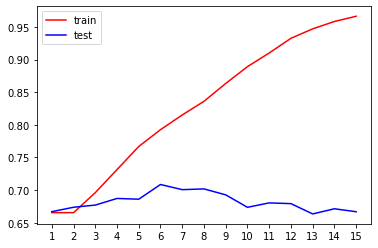

In [99]:

plt.figure()
plt.plot(range(1,16),tr,color='red',label='train')
plt.plot(range(1,16),te,color='blue',label='test')
plt.xticks(range(1,16))
plt.legend()
plt.show()

In [101]:
# 网格搜索
import numpy as np

parameters = {
    'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':[*range(1,10)],
    'min_samples_leaf':[*range(0,50,5)],
    'min_impurity_decrease': np.linspace(0,0.5,50)
}

model = DecisionTreeClassifier(random_state=10)
GS = GridSearchCV(model,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)


d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18000 fits failed out of a total of 180000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18000 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    % self.min_samples_

In [103]:
GS.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [104]:
GS.best_score_

0.7009472606246799